In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# !pip install pandas-profiling==3.1.0

# pip install pandas_profiling --upgrade (=> runtime 재실행)
# ProfileReport(df)

In [2]:
!pip install category_encoders 
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 363 kB/s 


In [3]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 37.8 MB 1.3 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=e53dd0406652144ca92b6e2574a879ac4cb923152fae9bb553c44da9470a481a
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152122 sha256=d72e5b0be0166814a83f2d468de5aa23487d264d35aaa92cc1de3114e2051855
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=465f66696089834027b49990af1ba5973d6c24bc6bbb70bf8247b94730b2b5e8
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.1 MB/s 


In [4]:
!pip install eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.0 MB/s 
     |████████████████████████████████| 133 kB 63.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a1bbf09c2a68cbbf12d7b697c701dd37f28f3a42a9d6a203d81b2f0d58ba139b
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [5]:
from google.colab import files
files.upload();

Saving bike_train.csv to bike_train.csv


In [34]:
bike = pd.read_csv('bike_train.csv')
print(bike.shape)
bike.head(2)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [35]:
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [36]:
bike.duplicated().sum()

0

In [37]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [38]:
bike.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [39]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


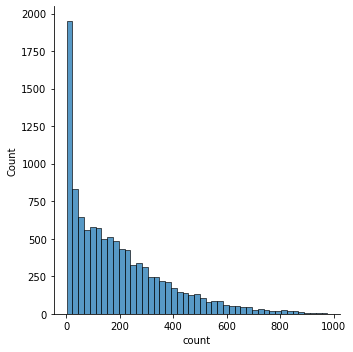

In [42]:
sns.displot(bike['count'])

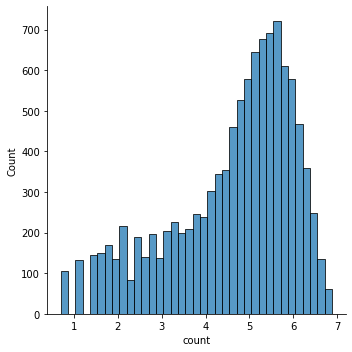

In [44]:
bike['count'] = np.log1p(bike['count'])
sns.displot(bike['count'])

In [47]:
bike.T

,0,1,2,3,4,5,6,7,8,9,...,10876,10877,10878,10879,10880,10881,10882,10883,10884,10885
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00,2011-01-01 05:00:00,2011-01-01 06:00:00,2011-01-01 07:00:00,2011-01-01 08:00:00,2011-01-01 09:00:00,...,2012-12-19 14:00:00,2012-12-19 15:00:00,2012-12-19 16:00:00,2012-12-19 17:00:00,2012-12-19 18:00:00,2012-12-19 19:00:00,2012-12-19 20:00:00,2012-12-19 21:00:00,2012-12-19 22:00:00,2012-12-19 23:00:00
season,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
holiday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
workingday,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
weather,1,1,1,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84,9.84,9.02,8.2,9.84,13.12,...,17.22,17.22,17.22,16.4,15.58,15.58,14.76,13.94,13.94,13.12
atemp,14.395,13.635,13.635,14.395,14.395,12.88,13.635,12.88,14.395,17.425,...,21.21,21.21,21.21,20.455,19.695,19.695,17.425,15.91,17.425,16.665
humidity,81,80,80,75,75,75,80,86,75,76,...,50,50,50,50,50,50,57,61,61,66
windspeed,0.0,0.0,0.0,0.0,0.0,6.0032,0.0,0.0,0.0,0.0,...,12.998,19.0012,23.9994,26.0027,23.9994,26.0027,15.0013,15.0013,6.0032,8.9981
casual,3,8,5,3,0,0,2,1,1,8,...,33,28,37,26,23,7,10,4,12,4


In [45]:
# datetime 내의 정보를 추출
bike['datetime'] = bike.datetime.apply(pd.to_datetime)

bike['year'] = bike.datetime.apply(lambda x: x.year)
bike['month'] = bike.datetime.apply(lambda x: x.month)
bike['day'] = bike.datetime.apply(lambda x: x.day)
bike['hour'] = bike.datetime.apply(lambda x: x.hour)
bike['minute'] = bike.datetime.apply(lambda x: x.minute)
bike['second'] = bike.datetime.apply(lambda x: x.second)


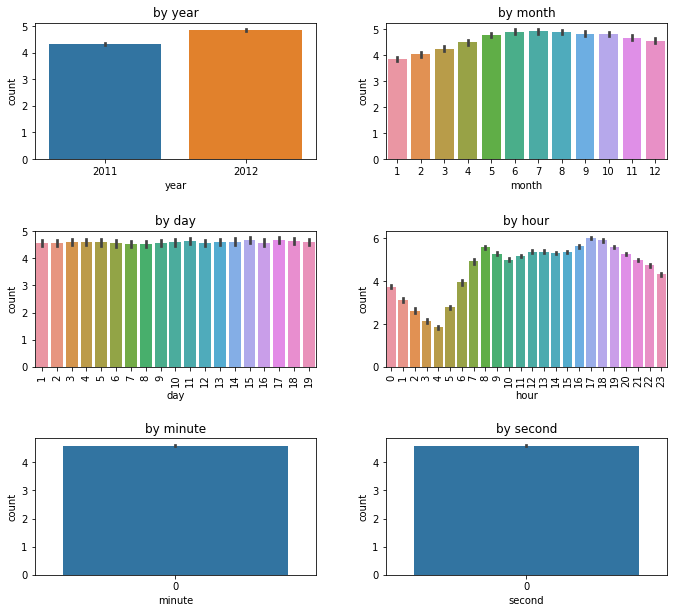

In [49]:
figure, axes = plt.subplots(nrows=3, ncols=2) 
plt.tight_layout()           
figure.set_size_inches(10, 9) 

sns.barplot(x='year', y='count', data=bike, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=bike, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=bike, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=bike, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=bike, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=bike, ax=axes[2, 1])

axes[0, 0].set(title='by year')
axes[0, 1].set(title='by month')
axes[1, 0].set(title='by day')
axes[1, 1].set(title='by hour')
axes[2, 0].set(title='by minute')
axes[2, 1].set(title='by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

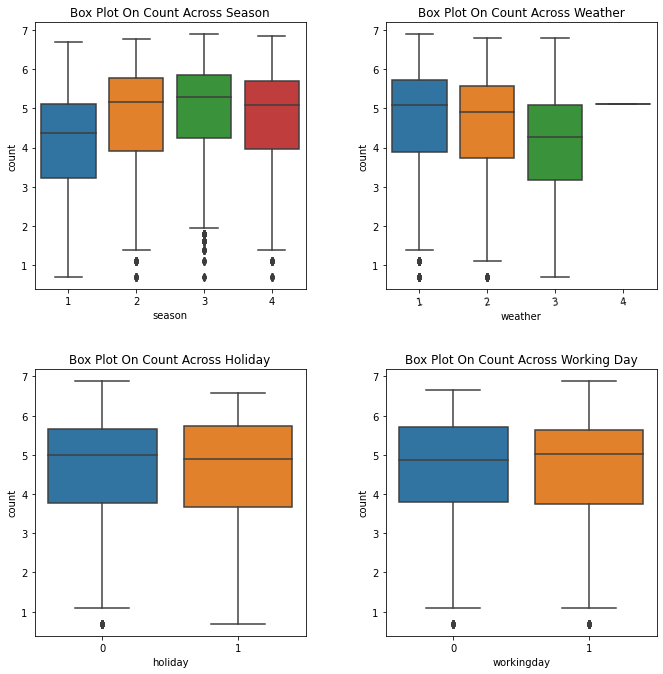

In [50]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=bike, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=bike, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=bike, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=bike, ax=axes[1, 1])

axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

axes[0, 1].tick_params('x', labelrotation=10)

In [52]:
bike.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

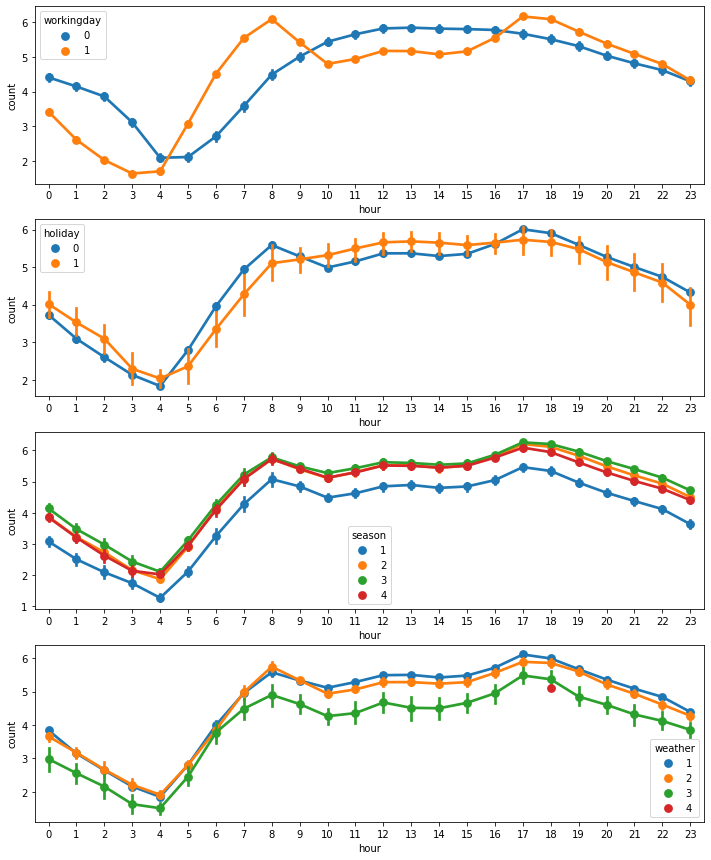

In [56]:
figure, axes = plt.subplots(nrows=4) 
figure.set_size_inches(12, 15)

# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=bike, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=bike, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=bike, hue='season', ax=axes[2])
sns.pointplot(x='hour', y='count', data=bike, hue='weather', ax=axes[3]);

In [54]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

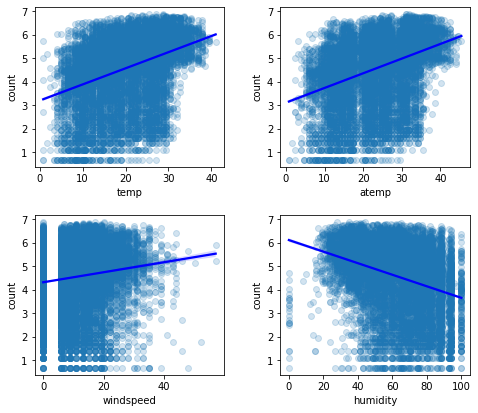

In [58]:
figure, axes = plt.subplots(nrows=2, ncols=2) 
plt.tight_layout()
figure.set_size_inches(7, 6)

# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=bike, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=bike, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=bike, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=bike, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

In [57]:
bike.windspeed.value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

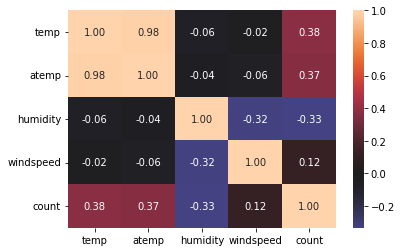

In [60]:
bike_corr = bike[['temp','atemp','humidity','windspeed','count']].corr()
sns.heatmap(bike_corr, annot=True, fmt='.2f', center=0)

In [61]:
# 이상치 제거
bike = bike[bike.weather!=4]

In [63]:
# 피처 삭제
bike = bike.drop(columns=['casual','registered','datetime','day','windspeed','month'])

In [65]:
bike = bike.drop(columns=['minute','second'])

In [67]:
X = bike.drop(columns='count')
y = bike['count']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 9), (2177, 9), (8708,), (2177,))

In [72]:
# evaluation 함수
def evaluate_reg(y, pred):
  RMSE = np.sqrt(mean_squared_error(y, pred))
  MAE = mean_absolute_error(y, pred)
  R2 = r2_score(y, pred)
  print(f'RMSE: {RMSE:.4f}, MAE: {MAE:.4f}, R2: {R2:.4f}')

In [73]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_reg(y_test_exp, pred_exp)

RMSE: 165.8016, MAE: 110.1211, R2: 0.1941


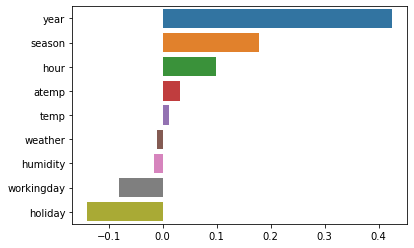

In [76]:
coef = pd.Series(lr_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
Ridge = Ri

In [90]:
rf_reg = RandomForestRegressor()

rf_params = {'random_state':[42], 'n_estimators':[300, 500, 700 ], 'max_depth':[4,6,8]}
grid_rf = GridSearchCV(estimator=rf_reg,
                       param_grid=rf_params,
                       scoring='neg_mean_squared_error',
                       cv=4)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'n_estimators': [300, 500, 700],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [91]:
print(f'Optimal Hyper Parameters: ', grid_rf.best_params_)

Optimal Hyper Parameters:  {'max_depth': 8, 'n_estimators': 500, 'random_state': 42}


In [92]:
pred = grid_rf.best_estimator_.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_reg(y_test_exp, pred_exp)

RMSE: 88.3043, MAE: 53.5773, R2: 0.7714


In [93]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [98]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[600, 800, 1000], 'max_depth':[5,6,7]}
lgbm_reg = LGBMRegressor(learning_rate=0.05,
                         subsample=0.6, colsample_bytree=0.4, n_jobs=-1)

print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.3183, 최적 alpha:{'max_depth': 5, 'n_estimators': 1000}


LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, max_depth=5,
              n_estimators=1000, subsample=0.6)

In [100]:
lgbm_reg = LGBMRegressor(n_estimators=1000, max_depth=5, learning_rate=0.05,                          
                         subsample=0.6, colsample_bytree=0.4, n_jobs=-1)
lgbm_reg.fit(X_train, y_train)

pred = lgbm_reg.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_reg(y_test_exp, pred_exp)

RMSE: 50.2954, MAE: 30.5985, R2: 0.9258


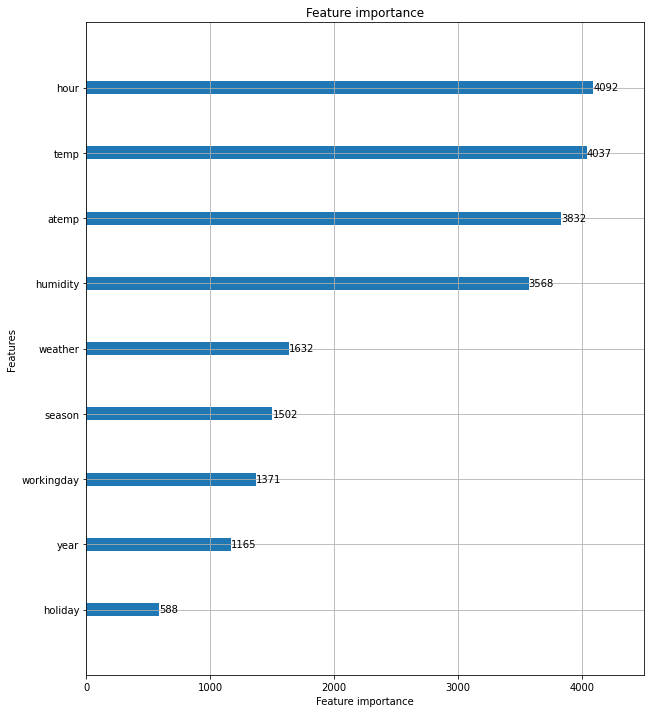

In [103]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_reg, ax=ax)

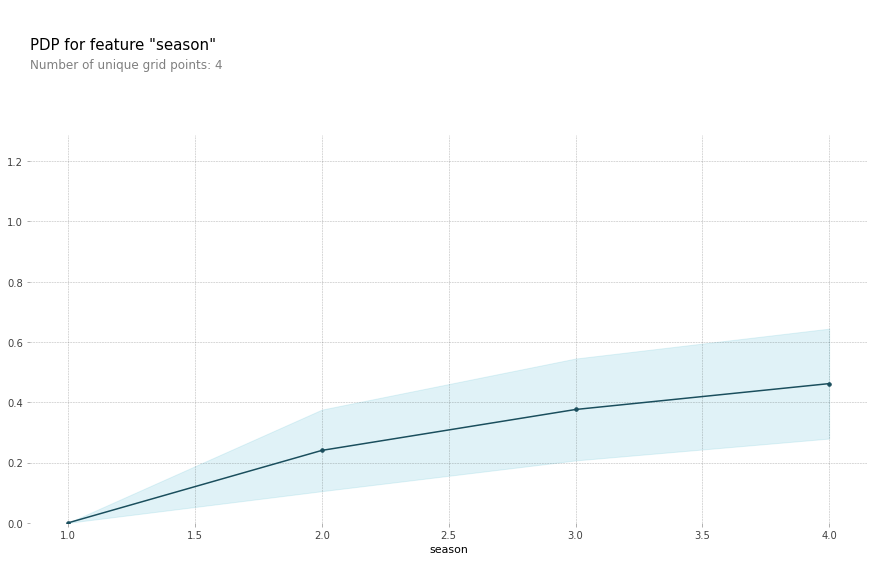

In [114]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature='season'
isolated = pdp_isolate(
    model=lgbm_reg,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature,
    grid_type='percentile',
    num_grid_points=10
)
pdp_plot(isolated, feature_name=feature);

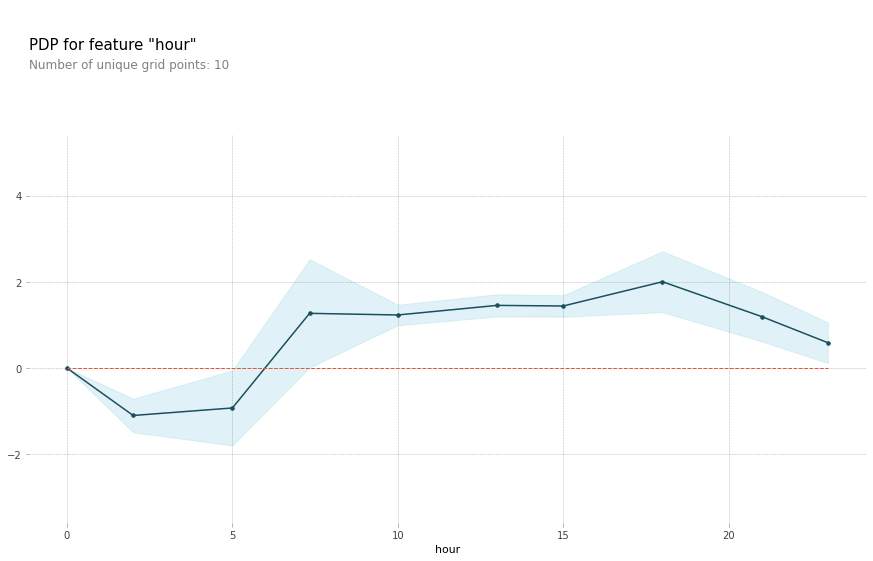

In [112]:
feature='hour'
isolated = pdp_isolate(
    model=lgbm_reg,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature,
    grid_type='percentile',
    num_grid_points=10
)
pdp_plot(isolated, feature_name=feature);

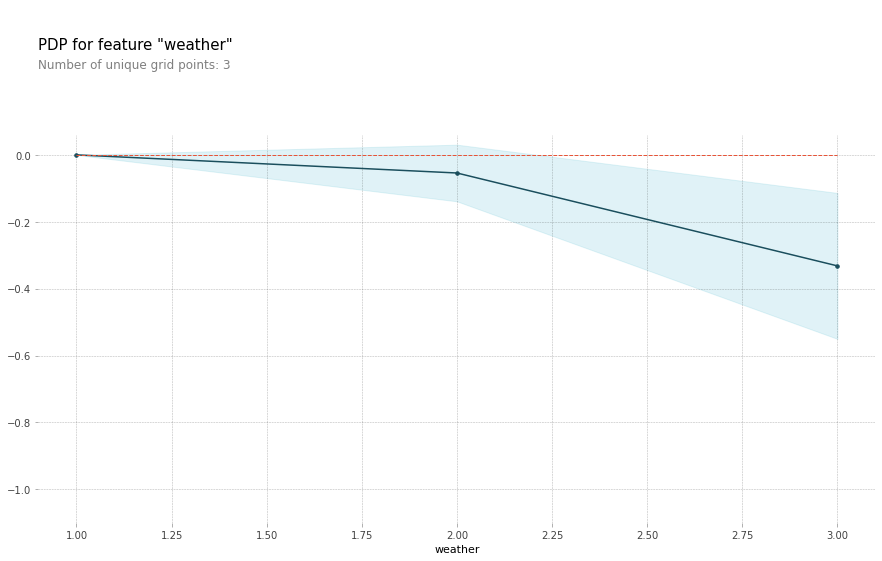

In [115]:
feature='weather'
isolated = pdp_isolate(
    model=lgbm_reg,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature,
    grid_type='percentile',
    num_grid_points=10
)
pdp_plot(isolated, feature_name=feature);